In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline

np.random.seed(42)

In [43]:
# Load data
train_df = pd.read_csv('../data/raw/exoTrain.csv')
test_df = pd.read_csv('../data/raw/exoTest.csv')

print(f'Training set: {train_df.shape}')
print(f'Test set: {test_df.shape}')
print(f'\nTotal samples: {len(train_df) + len(test_df)}')

Training set: (5087, 3198)
Test set: (570, 3198)

Total samples: 5657


In [44]:
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [45]:
# Check the LABEL column
print("Label distribution:")
print(train_df['LABEL'].value_counts())

Label distribution:
LABEL
1    5050
2      37
Name: count, dtype: int64


In [46]:
# Convert to binary
train_labels = (train_df['LABEL'] == 2).astype(int)
test_labels = (test_df['LABEL'] == 2).astype(int)

print('\nBinary labels (0=no planet, 1=planet):')
print(f'Training - No planet: {(train_labels == 0).sum()}, Planet: {(train_labels == 1).sum()}')
print(f'Test - No planet: {(test_labels == 0).sum()}, Planet: {(test_labels == 1).sum()}')

imbalance_ratio = (train_labels == 0).sum() / (train_labels == 1).sum()
print(f'\nClass imbalance ratio: {imbalance_ratio:.1f}:1')
print(f'Positive class: {100 * train_labels.sum() / len(train_labels):.2f}%')


Binary labels (0=no planet, 1=planet):
Training - No planet: 5050, Planet: 37
Test - No planet: 565, Planet: 5

Class imbalance ratio: 136.5:1
Positive class: 0.73%


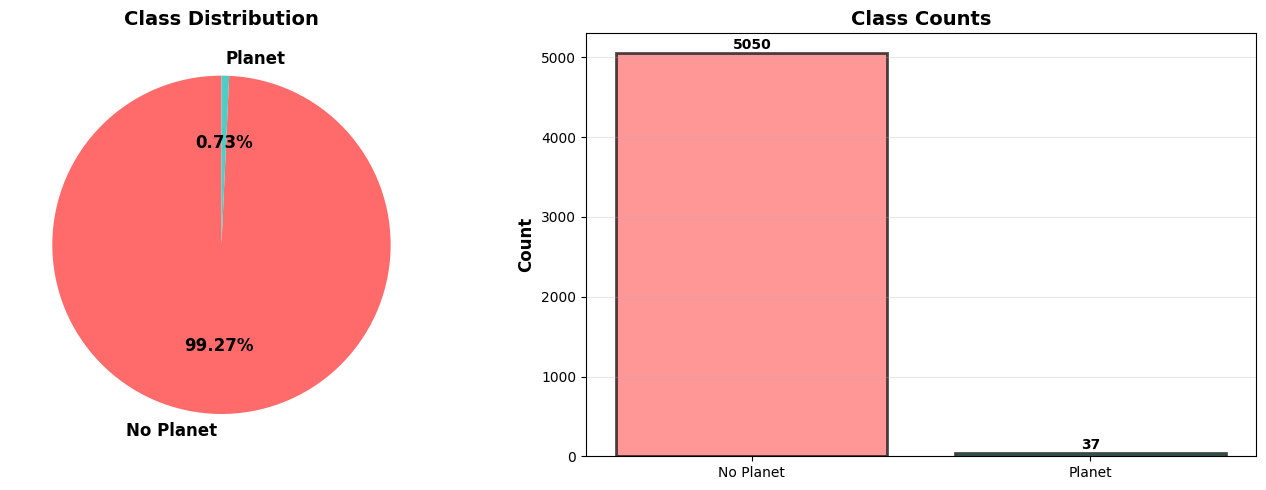

In [47]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
counts = [sum(train_labels == 0), sum(train_labels == 1)]
colors = ['#FF6B6B', '#4ECDC4']
axes[0].pie(counts, labels=['No Planet', 'Planet'], autopct='%1.2f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')

# Bar chart
axes[1].bar(['No Planet', 'Planet'], counts, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Class Counts', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(counts):
    axes[1].text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [48]:
train_flux = train_df.drop('LABEL', axis=1).values
test_flux = test_df.drop('LABEL', axis=1).values

print(f'Each light curve has {train_flux.shape[1]} time points')

Each light curve has 3197 time points


In [49]:
planet_idx = np.where(train_labels == 1)[0]
no_planet_idx = np.where(train_labels == 0)[0]

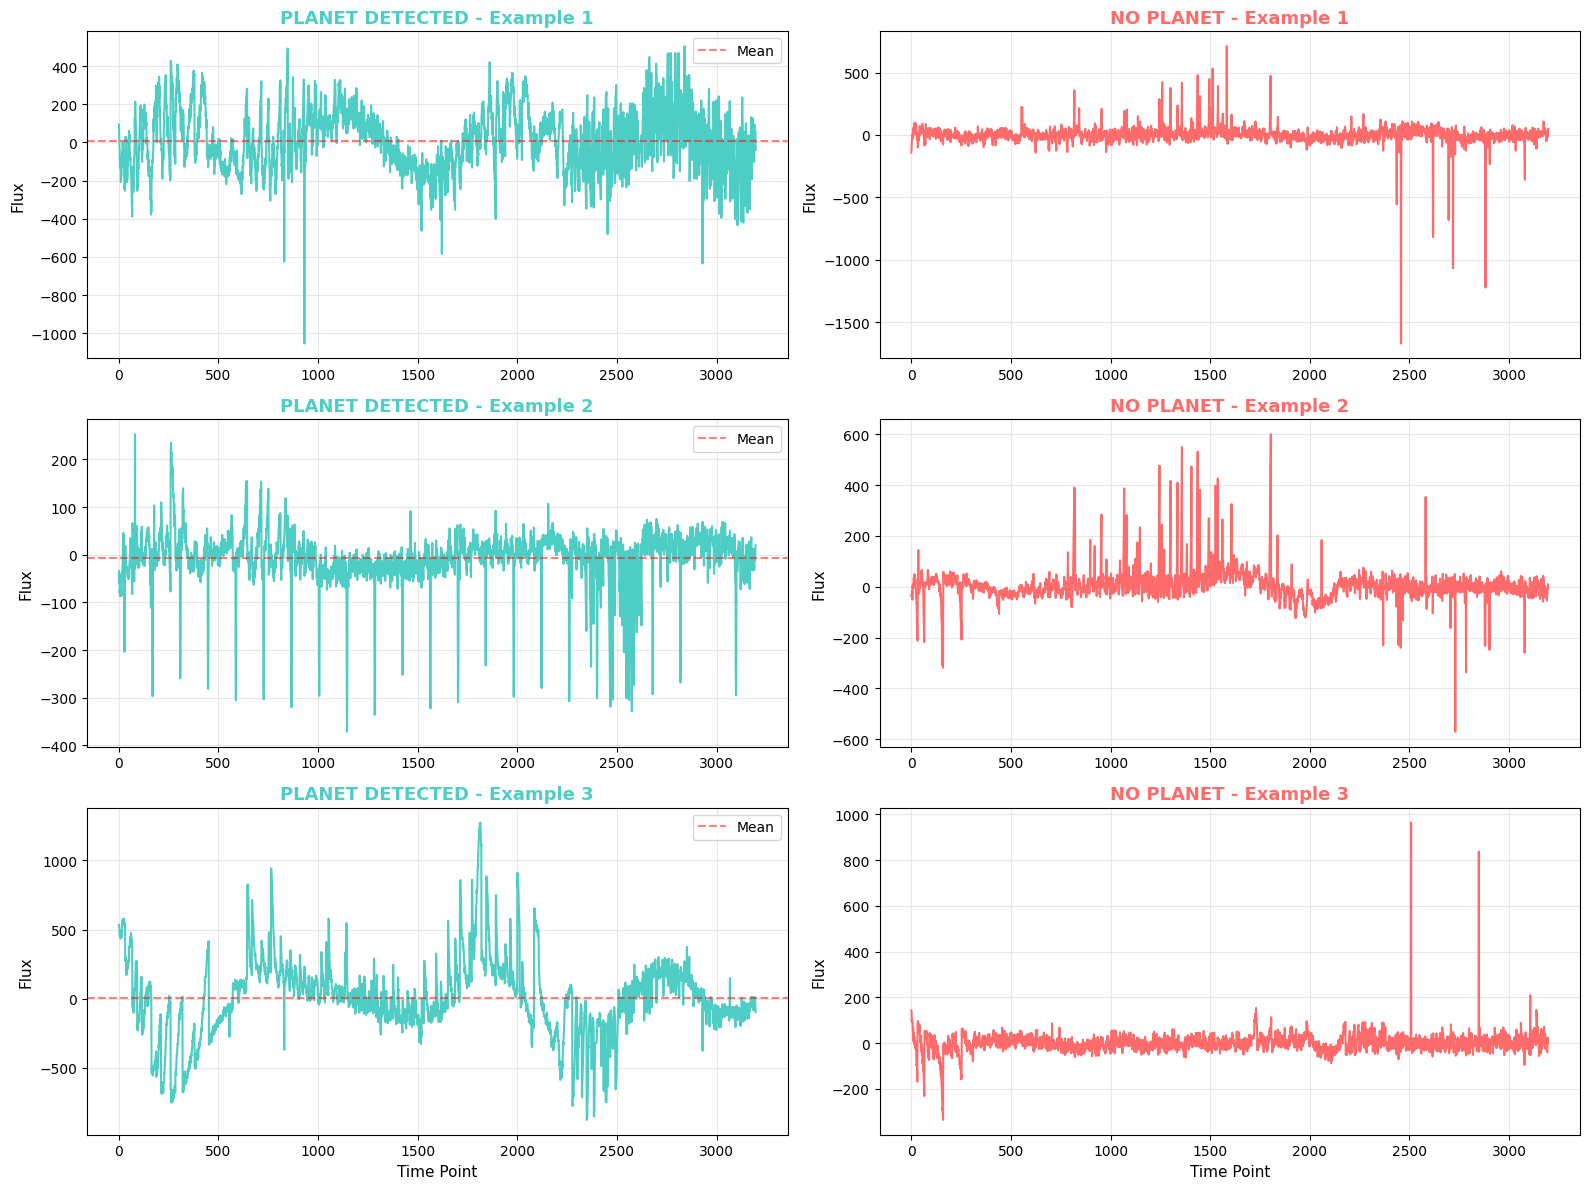

Planet examples show periodic dips (transits).


In [51]:
# Plot multiple examples
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Plot 3 planet examples
for i in range(3):
    idx = planet_idx[i]
    axes[i, 0].plot(train_flux[idx], linewidth=1.5, color='#4ECDC4')
    axes[i, 0].set_title(f'PLANET DETECTED - Example {i+1}', 
                          fontweight='bold', color='#4ECDC4', fontsize=13)
    axes[i, 0].set_ylabel('Flux', fontsize=11)
    axes[i, 0].grid(alpha=0.3)
    axes[i, 0].axhline(train_flux[idx].mean(), color='red', 
                        linestyle='--', alpha=0.5, label='Mean')
    axes[i, 0].legend()

# Plot 3 no-planet examples
for i in range(3):
    idx = no_planet_idx[i]
    axes[i, 1].plot(train_flux[idx], linewidth=1.5, color='#FF6B6B')
    axes[i, 1].set_title(f'NO PLANET - Example {i+1}', 
                          fontweight='bold', color='#FF6B6B', fontsize=13)
    axes[i, 1].set_ylabel('Flux', fontsize=11)
    axes[i, 1].grid(alpha=0.3)

axes[2, 0].set_xlabel('Time Point', fontsize=11)
axes[2, 1].set_xlabel('Time Point', fontsize=11)

plt.tight_layout()
plt.show()

print('Planet examples show periodic dips (transits).')

In [33]:
# Compare statistics
planet_flux = train_flux[train_labels == 1]
no_planet_flux = train_flux[train_labels == 0]

print('='*60)
print('STATISTICAL COMPARISON')
print('='*60)

print('\nPLANET light curves:')
print(f'  Mean: {planet_flux.mean():.2f}')
print(f'  Std: {planet_flux.std():.2f}')
print(f'  Min: {planet_flux.min():.2f}')
print(f'  Max: {planet_flux.max():.2f}')

print('\nNO PLANET light curves:')
print(f'  Mean: {no_planet_flux.mean():.2f}')
print(f'  Std: {no_planet_flux.std():.2f}')
print(f'  Min: {no_planet_flux.min():.2f}')
print(f'  Max: {no_planet_flux.max():.2f}')

STATISTICAL COMPARISON

PLANET light curves:
  Mean: -47.11
  Std: 4970.88
  Min: -118381.30
  Max: 150725.80

NO PLANET light curves:
  Mean: 131.72
  Std: 22148.83
  Min: -2385019.12
  Max: 4299288.00


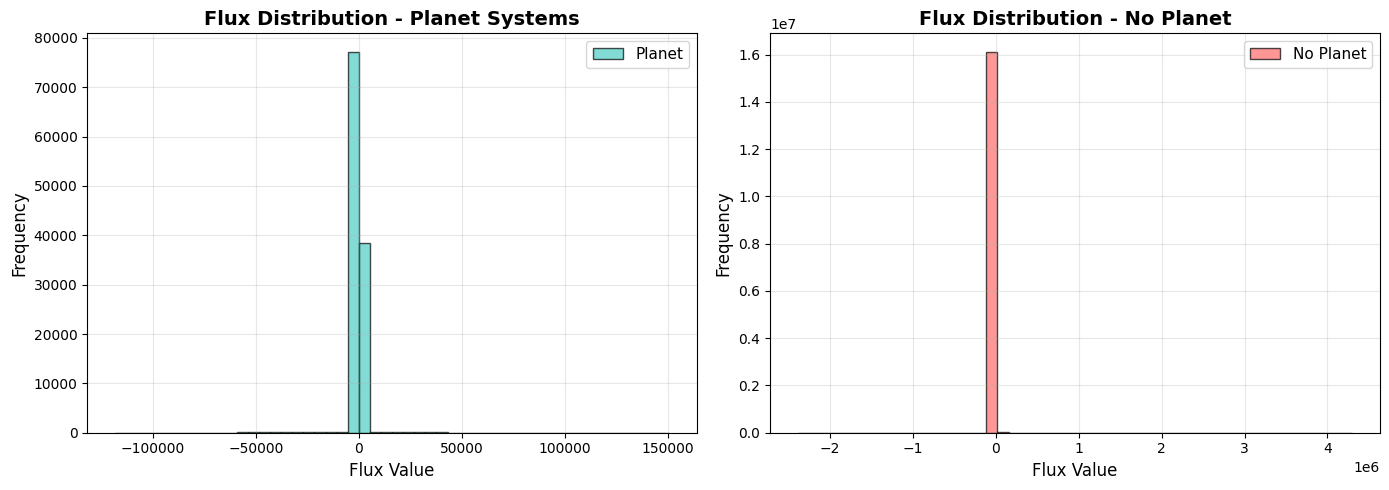

In [34]:
# Flux distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(planet_flux.flatten(), bins=50, alpha=0.7, 
             color='#4ECDC4', edgecolor='black', label='Planet')
axes[0].set_xlabel('Flux Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Flux Distribution - Planet Systems', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

axes[1].hist(no_planet_flux.flatten(), bins=50, alpha=0.7, 
             color='#FF6B6B', edgecolor='black', label='No Planet')
axes[1].set_xlabel('Flux Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Flux Distribution - No Planet', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [52]:
# Check for NaN values
nan_count = np.isnan(train_flux).sum()
nan_percentage = 100 * nan_count / train_flux.size

print(f'Total NaN values: {nan_count}')
print(f'Percentage: {nan_percentage:.4f}%')

Total NaN values: 0
Percentage: 0.0000%


In [36]:
# Check for outliers
q1 = np.percentile(train_flux, 25)
q3 = np.percentile(train_flux, 75)
iqr = q3 - q1

lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr

outliers = (train_flux < lower_bound) | (train_flux > upper_bound)
outlier_percentage = 100 * outliers.sum() / train_flux.size

print(f'Outliers (3×IQR): {outliers.sum()} ({outlier_percentage:.2f}%)')
print(f'Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]')

Outliers (3×IQR): 2599746 (15.99%)
Bounds: [-115.19, 116.23]


In [37]:
# Calculate basic features for each light curve
features_df = pd.DataFrame({
    'label': train_labels,
    'mean': train_flux.mean(axis=1),
    'std': train_flux.std(axis=1),
    'min': train_flux.min(axis=1),
    'max': train_flux.max(axis=1),
    'range': train_flux.max(axis=1) - train_flux.min(axis=1),
    'median': np.median(train_flux, axis=1),
})

features_df.head(10)

,label,mean,std,min,max,range,median
0,1,9.953857,160.703348,-1053.97,504.46,1558.43,-0.01
1,1,-7.427932,60.001638,-371.27,252.64,623.91,0.01
2,1,8.189087,281.832397,-874.95,1274.59,2149.54,-0.08
3,1,-4.646587,103.222575,-268.41,370.29,638.70,-0.01
4,1,-14.240660,407.057614,-1808.76,924.32,2733.08,0.02
5,1,18.015580,155.659957,-402.60,1087.88,1490.48,-0.02
6,1,1.267789,28.391373,-118.86,312.80,431.66,0.00
7,1,-88.620873,526.518308,-3382.64,1001.70,4384.34,-0.05
8,1,0.059118,37.111128,-324.05,269.97,594.02,0.02
9,1,209.115934,1501.191477,-3198.72,4892.72,8091.44,1.09


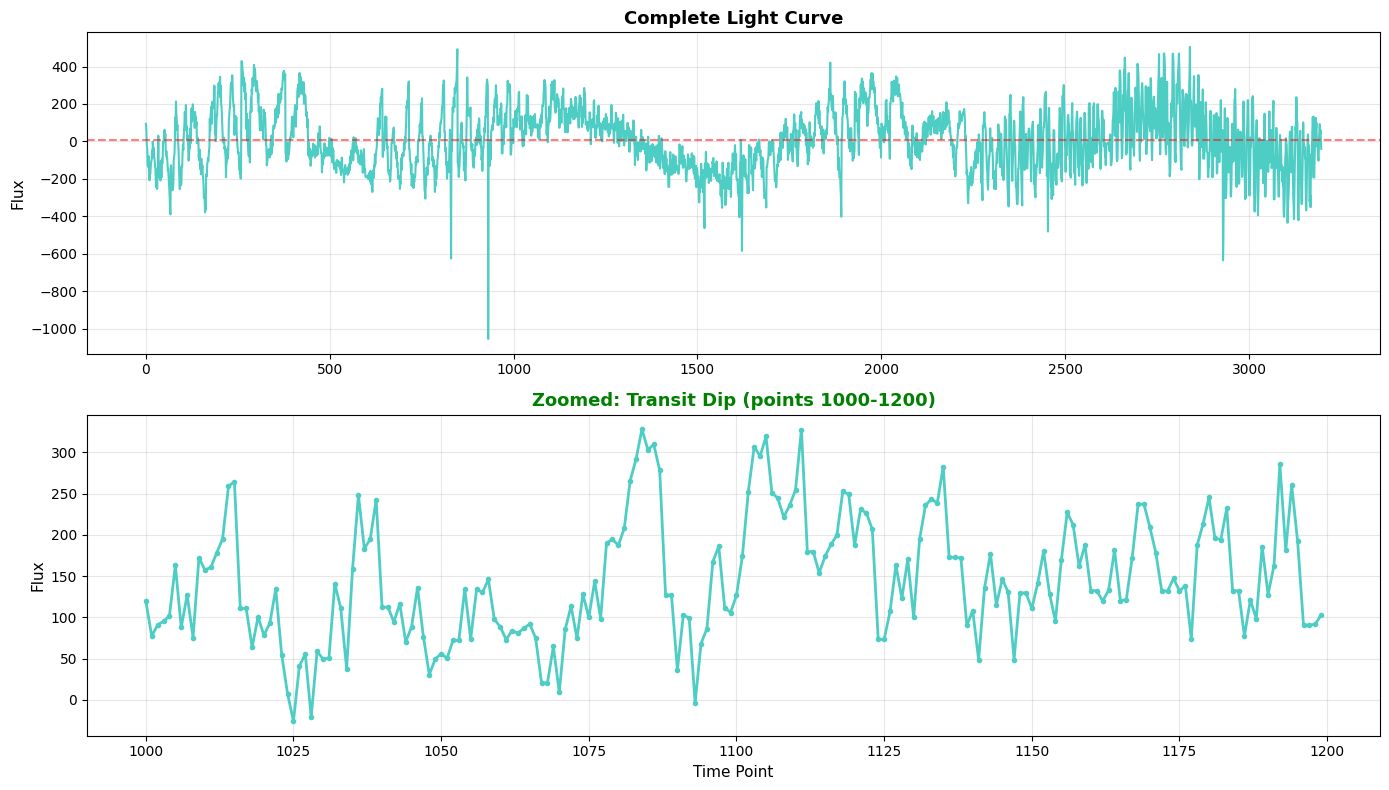

In [62]:
# Look at one planet example in detail
planet_example = train_flux[planet_idx[0]]

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Full light curve
axes[0].plot(planet_example, linewidth=1.5, color='#4ECDC4')
axes[0].set_title('Complete Light Curve', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Flux', fontsize=11)
axes[0].grid(alpha=0.3)
axes[0].axhline(planet_example.mean(), color='red', linestyle='--', alpha=0.5)

# Zoomed section showing transit
zoom_start, zoom_end = 1000, 1200
axes[1].plot(range(zoom_start, zoom_end), 
             planet_example[zoom_start:zoom_end], 
             linewidth=2, color='#4ECDC4', marker='o', markersize=3)
axes[1].set_title(f'Zoomed: Transit Dip (points {zoom_start}-{zoom_end})', 
                  fontsize=13, fontweight='bold', color='green')
axes[1].set_xlabel('Time Point', fontsize=11)
axes[1].set_ylabel('Flux', fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()